In [676]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Problem 1

In [677]:
df = pd.read_csv('cluster_data1.csv')

In [678]:
df.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [679]:
df.describe()

,X1,X2,X3,X4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [680]:
class KMeans:
    def __init__(self, K=3, max_iters=100, random_state=123):
        self.K = K
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        np.random.seed(self.random_state)

    def fit(self, X):

        if self.centroids is None:
            self.centroids = X[np.random.choice(X.shape[0], self.K, replace=False)]

        for _ in range(self.max_iters):
            distances = self.__calculate_distance(X, self.centroids)
            labels = np.argmin(distances, axis=0)

            new_centroids = self.__update_centroids(X, labels, self.K)

            if self.__did_converge(new_centroids):
                break

            self.centroids = new_centroids

        return self.centroids, labels

    def __calculate_distance(self, X, centroids):
        return np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

    def __update_centroids(self, X, labels, K):
        return np.array([X[labels == i].mean(axis=0) for i in range(K)])

    def __did_converge(self, new_centroids):
        return np.all(self.centroids == new_centroids)

    def plot(self, X, labels, step=None):

        plt.figure(figsize=(8, 6))
        for i in range(self.K):
            plt.scatter(X[labels == i, 0], X[labels == i, 1],
                        label=f'Cluster {i+1}', alpha=0.7)

        plt.scatter(self.centroids[:, 0], self.centroids[:, 1],
                    c='black', marker='x', s=200, linewidths=3, label='Centroids')
        title = f'K-means Clustering - Step {step}' if step is not None else 'Final K-means Clustering'
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.grid(True)
        plt.legend()
        plt.show()

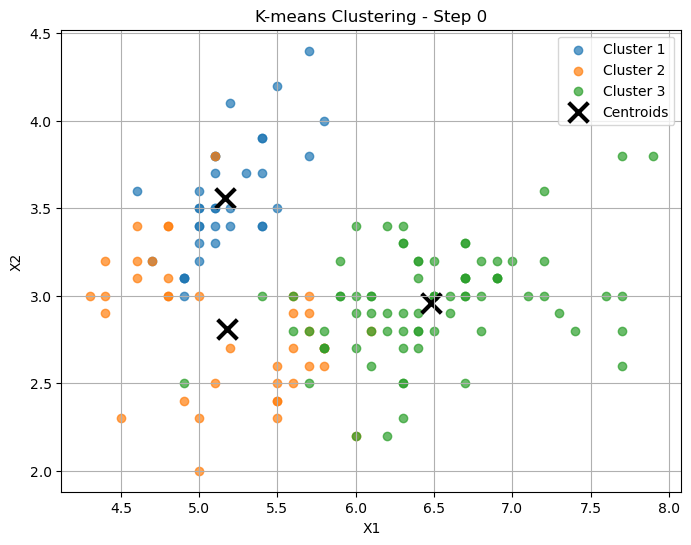

In [681]:
X = df[['X1', 'X2', 'X3', 'X4']].values


kmeans = KMeans(K=3, max_iters=1, random_state=123)

centroids, labels = kmeans.fit(X)

kmeans.plot(X, labels, step=0)

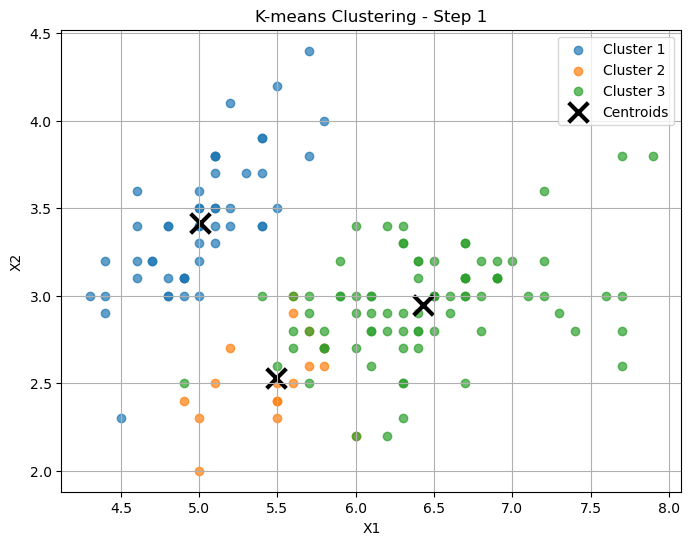

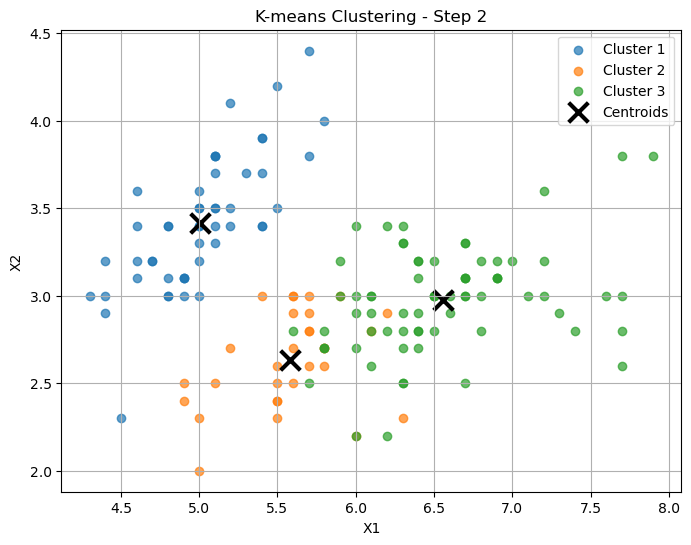

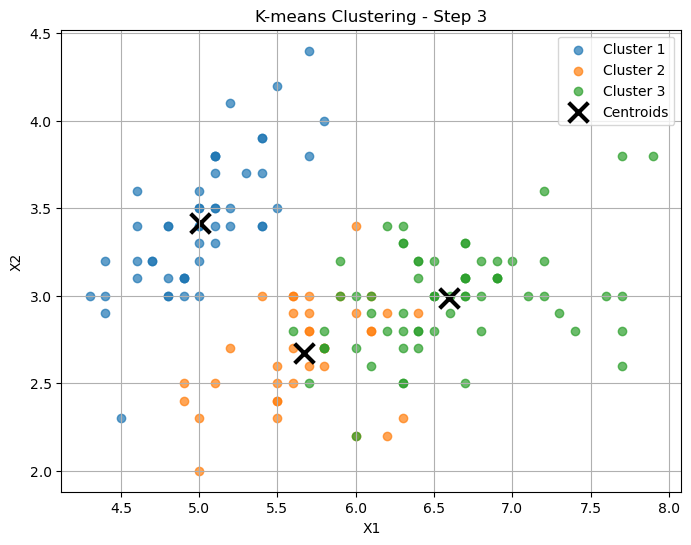

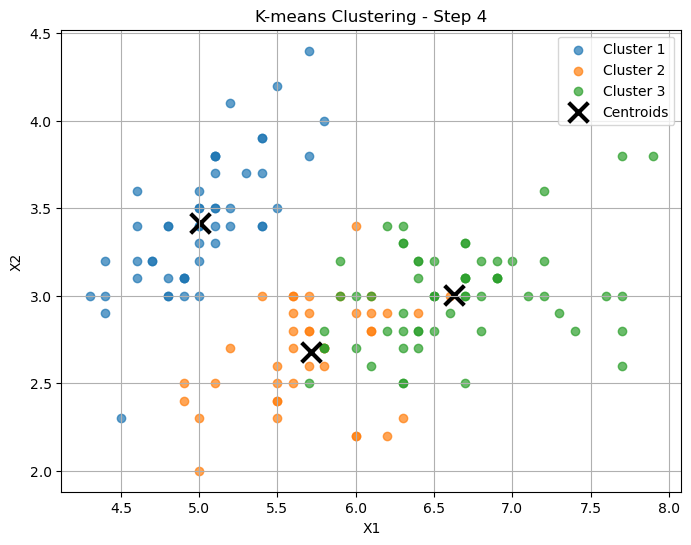

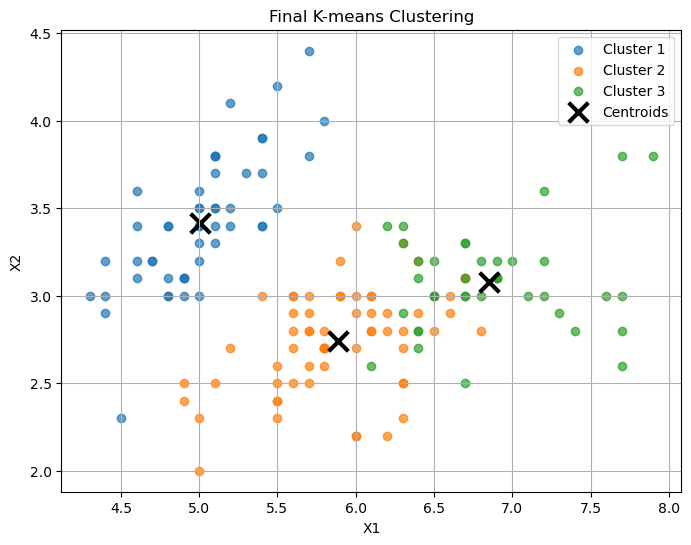

In [682]:
for i in range(1, 5):
    centroids, labels = kmeans.fit(X)
    kmeans.plot(X, labels, step=i)

kmeans = KMeans(K=3, max_iters=100, random_state=123)
centroids, labels = kmeans.fit(X)
kmeans.plot(X, labels)

Problem 2

In [683]:
class KMeansPlusPlus:
    def __init__(self, K=3, max_iters=100, random_state=123):
        self.K = K
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        np.random.seed(self.random_state)

    def __initialize_centroids(self, X):
        centroids = [X[np.random.choice(X.shape[0])]]

        for _ in range(1, self.K):
            distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

            next_centroid = X[np.argmax(distances)]
            centroids.append(next_centroid)

        return np.array(centroids)


    def __calculate_distance(self, X, centroids):
        return np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

    def __update_centroids(self, X, labels, K):
        return np.array([X[labels == i].mean(axis=0) for i in range(K)])

    def __did_converge(self, new_centroids):
        return np.all(self.centroids == new_centroids)

    def fit(self, X):
        self.centroids = self.__initialize_centroids(X)

        for _ in range(self.max_iters):
            distances = self.__calculate_distance(X, self.centroids)
            labels = np.argmin(distances, axis=0)

            new_centroids = self.__update_centroids(X, labels, self.K)

            if self.__did_converge(new_centroids):
                break

            self.centroids = new_centroids

        return self.centroids, labels

    def plot(self, X, labels, step=None):

        plt.figure(figsize=(8, 6))
        for i in range(self.K):
            plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}', alpha=0.7)

        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='black', marker='x', s=200, linewidths=3, label='Centroids')
        title = f'K-means++ Clustering - Step {step}' if step is not None else 'Final K-means++ Clustering'
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()

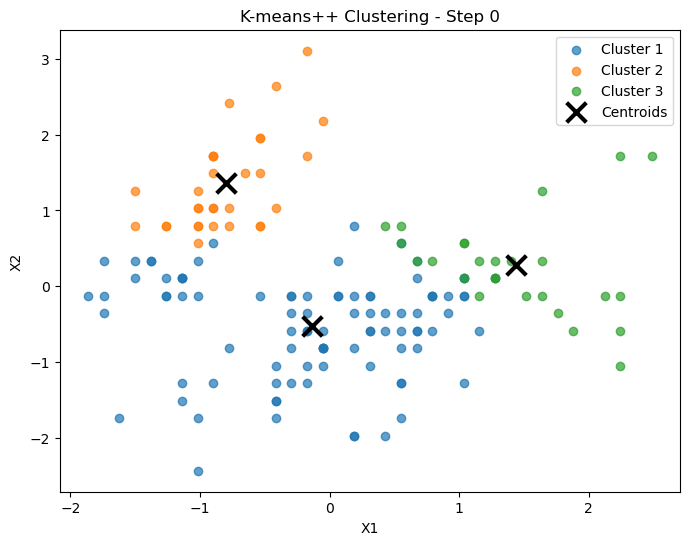

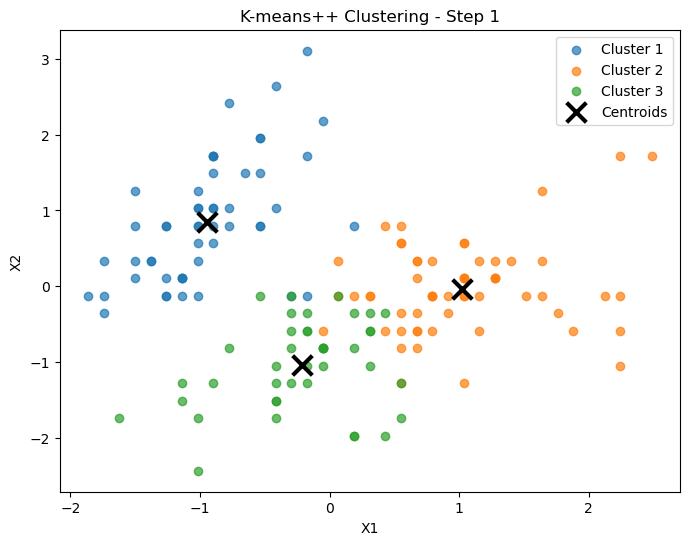

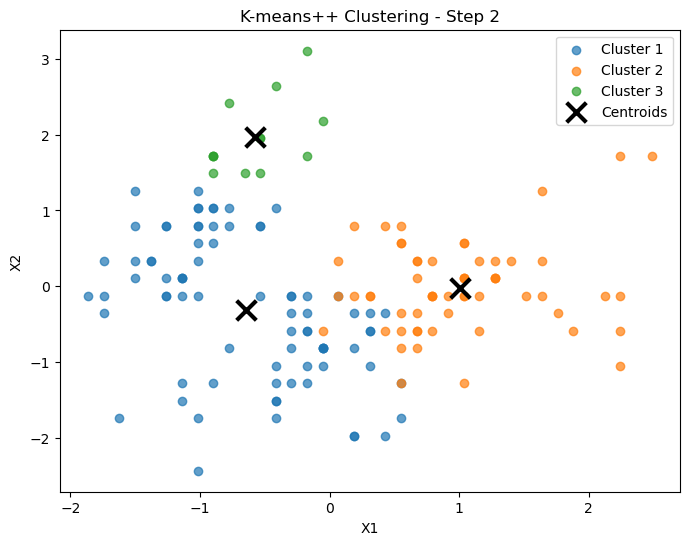

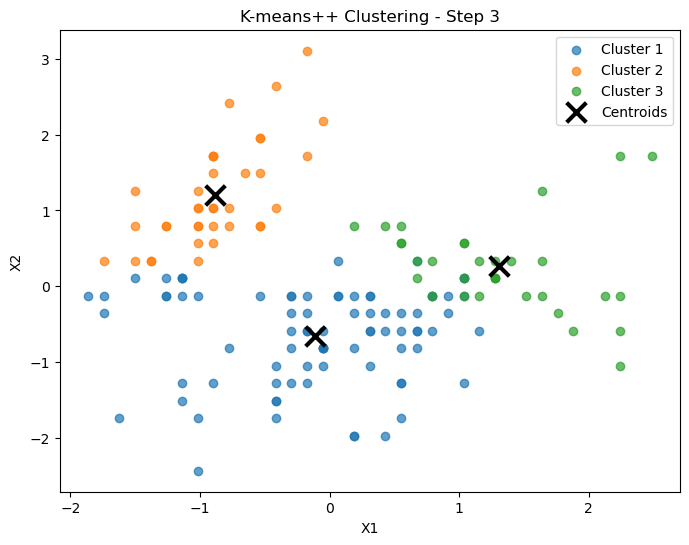

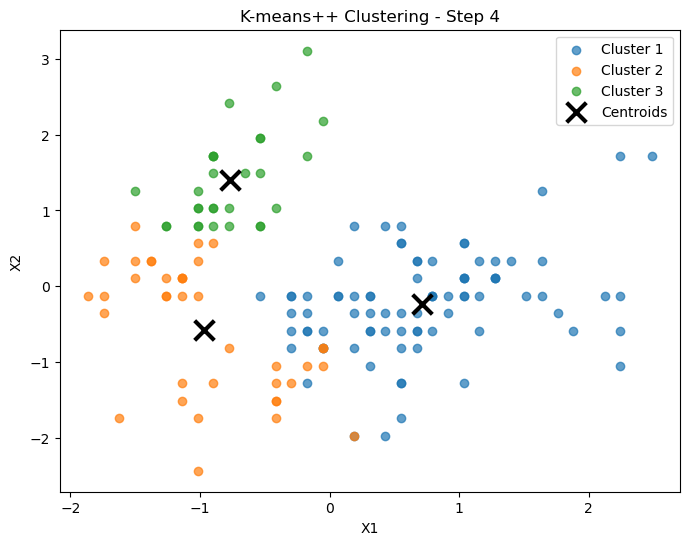

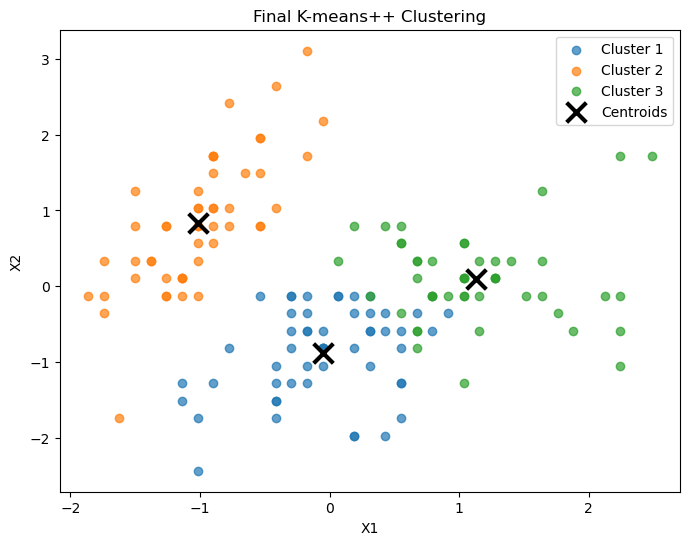

In [684]:
kmeans = KMeansPlusPlus(K=3, max_iters=1, random_state=123)

standardized_df = (df - df.mean()) / df.std()

X = standardized_df[['X1', 'X2', 'X3', 'X4']].values

for i in range(5):
  centroids, labels = kmeans.fit(X)
  kmeans.plot(X, labels, step=i)

kmeans = KMeansPlusPlus(K=3, max_iters=100, random_state=123)
centroids, labels = kmeans.fit(X)
kmeans.plot(X, labels)

Problem 3

In [685]:
df2 = pd.read_csv('cluster_data2.csv')

In [686]:
df2.head()

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05


In [687]:
standardized_df2 = (df2 - df2.mean()) / df2.std()

In [688]:
standardized_df2.head()

,X1,X2,X3,X4
0,-0.916327,2.019833,-1.320510,-1.245095
1,-1.118883,1.206478,-1.314864,-1.323843
2,0.009646,-1.369149,0.215317,0.093623
3,-0.294189,-1.098030,0.153206,0.041124
4,1.022428,-0.521903,1.005816,1.117348


In [689]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def __euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def predict(self, X_train, y_train, X_test):
        predictions = []
        for _, test_point in enumerate(X_test):
            distances = [self.__euclidean_distance(test_point, x) for x in X_train]

            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [y_train[i] for i in k_indices]
            most_common = self.__find_most_common(k_nearest_labels)
            predictions.append(most_common)
        return predictions

    def __find_most_common(self, labels):
        label_counts = np.bincount(labels)
        return np.argmax(label_counts)


In [690]:
X_test_new = standardized_df2[['X1', 'X2', 'X3', 'X4']].values

In [691]:

knn = KNN(k=3)
y_train = labels
X_train = X[:, :4]
predicted_labels = knn.predict(X_train, y_train, X_test_new)

print("Predicted labels for df2:", predicted_labels)




Predicted labels for df2: [1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0]


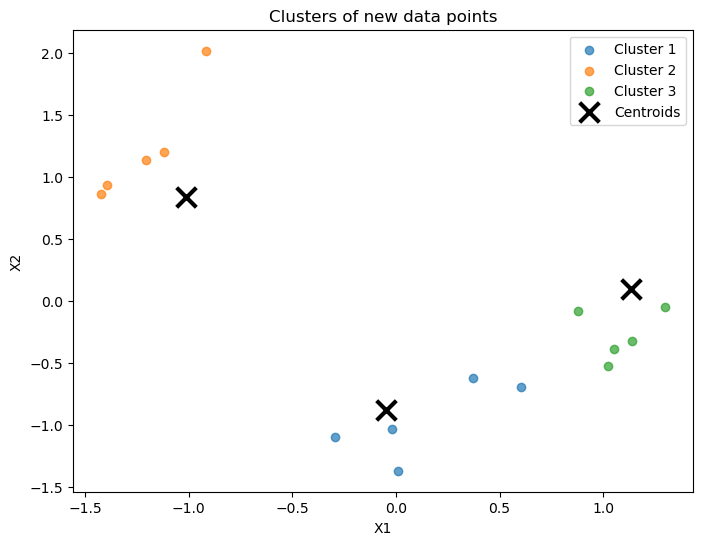

In [692]:
plt.figure(figsize=(8, 6))
for i in range(len(centroids)):
  plt.scatter(X_test_new[np.array(predicted_labels) == i, 0], X_test_new[np.array(predicted_labels) == i, 1], label=f'Cluster {i+1}', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('Clusters of new data points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()